In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6265374188764762629
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5555863552
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10469905451349836328
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060 Ti, pci bus id: 0000:2b:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


In [2]:
# Import necessary modules
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.datasets import cifar100
from keras.utils import to_categorical

# Load CIFAR100 dataset
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Convert class vectors to binary class matrices
train_labels = to_categorical(train_labels, 100)
test_labels = to_categorical(test_labels, 100)

print(train_labels.shape, test_labels.shape)



(50000, 100) (10000, 100)


In [3]:
# AlexNet model architecture
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(32,32,3), kernel_size=(11,11), strides=(4,4), padding='same'))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('tanh'))

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('tanh'))

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

# Fully Connected layer
model.add(Flatten())
model.add(Dense(4096, input_shape=(32,32,3,)))
model.add(BatchNormalization())
model.add(Activation('tanh'))

# Add Dropout to prevent overfitting
model.add(Dropout(0.5))

# Fully Connected Layer
model.add(Dense(4096))
model.add(BatchNormalization())
model.add(Activation('tanh'))
# Add Dropout
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(100))  # Changed to 100 for CIFAR-100
model.add(BatchNormalization())
model.add(Activation('softmax'))

# Model Summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 8, 8, 96)          34944     
                                                                 
 batch_normalization (BatchN  (None, 8, 8, 96)         384       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 8, 8, 96)          0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 96)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 256)         614656    
                                                                 
 batch_normalization_1 (Batc  (None, 4, 4, 256)        1

In [4]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
# model.fit(train_images, train_labels, epochs=90, 
#           validation_data=(test_images, test_labels))

history = model.fit(train_images, train_labels, epochs=90, 
                    validation_data=(test_images, test_labels))

Epoch 1/90
1563/1563 [==============================] - 16s 9ms/step - loss: 4.3615 - accuracy: 0.0489 - val_loss: 3.8613 - val_accuracy: 0.1233
Epoch 2/90
1563/1563 [==============================] - 13s 8ms/step - loss: 3.9464 - accuracy: 0.0981 - val_loss: 3.6589 - val_accuracy: 0.1632
Epoch 3/90
1563/1563 [==============================] - 13s 8ms/step - loss: 3.7746 - accuracy: 0.1278 - val_loss: 3.5152 - val_accuracy: 0.1885
Epoch 4/90
1563/1563 [==============================] - 13s 8ms/step - loss: 3.6609 - accuracy: 0.1489 - val_loss: 3.4014 - val_accuracy: 0.2067
Epoch 5/90
1563/1563 [==============================] - 13s 8ms/step - loss: 3.5534 - accuracy: 0.1701 - val_loss: 3.3308 - val_accuracy: 0.2212
Epoch 6/90
1563/1563 [==============================] - 13s 8ms/step - loss: 3.4736 - accuracy: 0.1823 - val_loss: 3.2717 - val_accuracy: 0.2292
Epoch 7/90
1563/1563 [==============================] - 13s 8ms/step - loss: 3.3945 - accuracy: 0.1994 - val_loss: 3.2585 - val_ac

1563/1563 [==============================] - 13s 8ms/step - loss: 0.5875 - accuracy: 0.9051 - val_loss: 3.8450 - val_accuracy: 0.3081
Epoch 58/90
1563/1563 [==============================] - 13s 9ms/step - loss: 0.5642 - accuracy: 0.9106 - val_loss: 4.0384 - val_accuracy: 0.2916
Epoch 59/90
1563/1563 [==============================] - 13s 8ms/step - loss: 0.5426 - accuracy: 0.9158 - val_loss: 3.9276 - val_accuracy: 0.3095
Epoch 60/90
1563/1563 [==============================] - 13s 8ms/step - loss: 0.5235 - accuracy: 0.9206 - val_loss: 3.9841 - val_accuracy: 0.3079
Epoch 61/90
1563/1563 [==============================] - 13s 8ms/step - loss: 0.5063 - accuracy: 0.9250 - val_loss: 3.9493 - val_accuracy: 0.3089
Epoch 62/90
1563/1563 [==============================] - 13s 8ms/step - loss: 0.4793 - accuracy: 0.9294 - val_loss: 4.0205 - val_accuracy: 0.3117
Epoch 63/90
1563/1563 [==============================] - 13s 8ms/step - loss: 0.4611 - accuracy: 0.9344 - val_loss: 3.9701 - val_accurac

In [5]:
#cifar100, relu 대신 tanh 사용

accuracy = model.evaluate(test_images, test_labels, verbose=1)
print('Test loss:', accuracy[0])
print('Test accuracy:', accuracy[1])


313/313 [==============================] - 1s 3ms/step - loss: 4.5618 - accuracy: 0.3041
Test loss: 4.56181001663208
Test accuracy: 0.30410000681877136


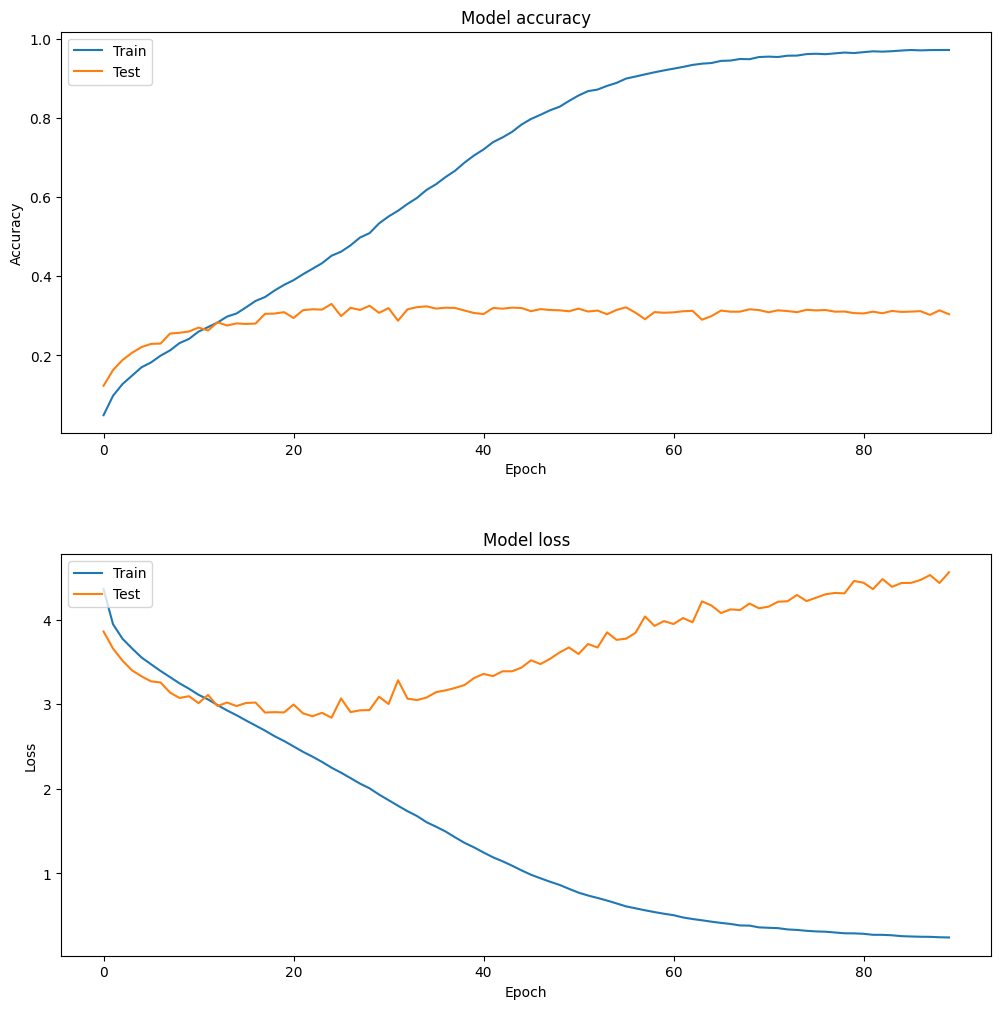

In [6]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplots_adjust(hspace=0.3)
plt.show()
